## 1. Importing libraries

In [31]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

## 2. Torch exploration

### 2.1 Tensores

In [2]:
d =torch.zeros((5,5))
d

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [74]:
torch.zeros?
# Keep an eye for device and requires_grad

Docstring:
zeros(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Returns a tensor filled with the scalar value `0`, with the shape defined
by the variable argument :attr:`size`.

Args:
    size (int...): a sequence of integers defining the shape of the output tensor.
        Can be a variable number of arguments or a collection like a list or tuple.

Keyword args:
    out (Tensor, optional): the output tensor.
    dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
        Default: if ``None``, uses a global default (see :func:`torch.set_default_dtype`).
    layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
        Default: ``torch.strided``.
    device (:class:`torch.device`, optional): the desired device of returned tensor.
        Default: if ``None``, uses the current device for the default tensor type
        (see :func:`torch.set_default_device`). :attr:`device` will be

In [4]:
type(d)

torch.Tensor

In [7]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

In [8]:
tensor.numpy()

array([[1, 2, 3],
       [4, 5, 6]])

In [9]:
torch.Tensor?

Init signature: torch.Tensor(self, /, *args, **kwargs)
Docstring:      <no docstring>
File:           ~/Desktop/Projects/.venv/lib/python3.8/site-packages/torch/__init__.py
Type:           _TensorMeta
Subclasses:     SparseSemiStructuredTensor, Parameter, UninitializedBuffer, MaskedTensor, FakeTensor, FunctionalTensor

In [18]:
m = torch.Tensor([1,2,3])
m.numpy()

array([1., 2., 3.], dtype=float32)

array([1, 2, 3])

In [10]:
torch.tensor?

Docstring:
tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor

Constructs a tensor with no autograd history (also known as a "leaf tensor", see :doc:`/notes/autograd`) by copying :attr:`data`.

.. warning::

    When working with tensors prefer using :func:`torch.Tensor.clone`,
    :func:`torch.Tensor.detach`, and :func:`torch.Tensor.requires_grad_` for
    readability. Letting `t` be a tensor, ``torch.tensor(t)`` is equivalent to
    ``t.clone().detach()``, and ``torch.tensor(t, requires_grad=True)``
    is equivalent to ``t.clone().detach().requires_grad_(True)``.

.. seealso::

    :func:`torch.as_tensor` preserves autograd history and avoids copies where possible.
    :func:`torch.from_numpy` creates a tensor that shares storage with a NumPy array.

Args:
    data (array_like): Initial data for the tensor. Can be a list, tuple,
        NumPy ``ndarray``, scalar, and other types.

Keyword args:
    dtype (:class:`torch.dtype`, optional): the de

### 2.2 nn

In [19]:
nn?

Type:        module
String form: <module 'torch.nn' from '/Users/abhishekde/Desktop/Projects/.venv/lib/python3.8/site-packages/torch/nn/__init__.py'>
File:        ~/Desktop/Projects/.venv/lib/python3.8/site-packages/torch/nn/__init__.py
Docstring:   <no docstring>

In [20]:
nn.Linear?

Init signature:
nn.Linear(
    in_features: int,
    out_features: int,
    bias: bool = True,
    device=None,
    dtype=None,
) -> None
Docstring:     
Applies a linear transformation to the incoming data: :math:`y = xA^T + b`.

This module supports :ref:`TensorFloat32<tf32_on_ampere>`.

On certain ROCm devices, when using float16 inputs this module will use :ref:`different precision<fp16_on_mi200>` for backward.

Args:
    in_features: size of each input sample
    out_features: size of each output sample
    bias: If set to ``False``, the layer will not learn an additive bias.
        Default: ``True``

Shape:
    - Input: :math:`(*, H_{in})` where :math:`*` means any number of
      dimensions including none and :math:`H_{in} = \text{in\_features}`.
    - Output: :math:`(*, H_{out})` where all but the last dimension
      are the same shape as the input and :math:`H_{out} = \text{out\_features}`.

Attributes:
    weight: the learnable weights of the module of shape
        :math:`

In [23]:
lin_layer = nn.Linear(in_features = 5, out_features=1, bias=True)

In [25]:
nn.Module?

Init signature: nn.Module(*args, **kwargs) -> None
Docstring:     
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

.. note::
    As per the example above, an ``__init__()`` call to the parent class
    must be made before assignment on the child.

:ivar training: Boolean represents whether this module is in training or
                ev

In [27]:
class Model(nn.Module):
    def __init__(self):
        super().__init__() # initialize the base class
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))
    
dummy_model = Model()

In [28]:
dummy_model.eval()

Model(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
)

In [29]:
dir(nn)

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d',
 'AvgPool3d',
 'BCELoss',
 'BCEWithLogitsLoss',
 'BatchNorm1d',
 'BatchNorm2d',
 'BatchNorm3d',
 'Bilinear',
 'CELU',
 'CTCLoss',
 'ChannelShuffle',
 'CircularPad1d',
 'CircularPad2d',
 'CircularPad3d',
 'ConstantPad1d',
 'ConstantPad2d',
 'ConstantPad3d',
 'Container',
 'Conv1d',
 'Conv2d',
 'Conv3d',
 'ConvTranspose1d',
 'ConvTranspose2d',
 'ConvTranspose3d',
 'CosineEmbeddingLoss',
 'CosineSimilarity',
 'CrossEntropyLoss',
 'CrossMapLRN2d',
 'DataParallel',
 'Dropout',
 'Dropout1d',
 'Dropout2d',
 'Dropout3d',
 'ELU',
 'Embedding',
 'EmbeddingBag',
 'FeatureAlphaDropout',
 'Flatten',
 'Fold',
 'FractionalMaxPool2d',
 'FractionalMaxPool3d',
 'GELU',
 'GLU',
 'GRU',
 'GRUCell',
 'GaussianNLLLoss',
 'GroupNorm',
 'Hardshrink',
 'Hardsigmoid',
 'Hardswish',
 'Hardtanh',
 'HingeEmbed

### 2.3 Functional

In [30]:
dir(F)

['BroadcastingList1',
 'BroadcastingList2',
 'BroadcastingList3',
 'Callable',
 'DType',
 'GRID_SAMPLE_INTERPOLATION_MODES',
 'GRID_SAMPLE_PADDING_MODES',
 'List',
 'Optional',
 'TYPE_CHECKING',
 'Tensor',
 'Tuple',
 'Union',
 '_Reduction',
 '_VF',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_adaptive_max_pool1d',
 '_adaptive_max_pool2d',
 '_adaptive_max_pool3d',
 '_add_docstr',
 '_canonical_mask',
 '_fractional_max_pool2d',
 '_fractional_max_pool3d',
 '_get_softmax_dim',
 '_in_projection',
 '_in_projection_packed',
 '_infer_size',
 '_is_integer',
 '_list_with_default',
 '_max_pool1d',
 '_max_pool2d',
 '_max_pool3d',
 '_mha_shape_check',
 '_no_grad_embedding_renorm_',
 '_none_or_dtype',
 '_overload',
 '_pair',
 '_single',
 '_sym_int',
 '_threshold',
 '_triple',
 '_unpool_output_size',
 '_verify_batch_size',
 '_verify_spatial_size',
 'adaptive_avg_pool1d',
 'adaptive_avg_pool2d',
 'adaptive_avg_pool3d',
 'adaptive_m

### 2.4 Dataset and DataLoader

In [32]:
dir(Dataset)

['__add__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_is_protocol']

In [33]:
Dataset?

Init signature: Dataset(*args, **kwds)
Docstring:     
An abstract class representing a :class:`Dataset`.

All datasets that represent a map from keys to data samples should subclass
it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
data sample for a given key. Subclasses could also optionally overwrite
:meth:`__len__`, which is expected to return the size of the dataset by many
:class:`~torch.utils.data.Sampler` implementations and the default options
of :class:`~torch.utils.data.DataLoader`. Subclasses could also
optionally implement :meth:`__getitems__`, for speedup batched samples
loading. This method accepts list of indices of samples of batch and returns
list of samples.

.. note::
  :class:`~torch.utils.data.DataLoader` by default constructs an index
  sampler that yields integral indices.  To make it work with a map-style
  dataset with non-integral indices/keys, a custom sampler must be provided.
File:           ~/Desktop/Projects/.venv/lib/python3

In [34]:
dir(DataLoader)

['_DataLoader__initialized',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_get_iterator',
 '_index_sampler',
 '_is_protocol',
 'check_worker_number_rationality',
 'multiprocessing_context']

In [35]:
DataLoader?

Init signature: DataLoader(*args, **kwds)
Docstring:     
Data loader combines a dataset and a sampler, and provides an iterable over the given dataset.

The :class:`~torch.utils.data.DataLoader` supports both map-style and
iterable-style datasets with single- or multi-process loading, customizing
loading order and optional automatic batching (collation) and memory pinning.

See :py:mod:`torch.utils.data` documentation page for more details.

Args:
    dataset (Dataset): dataset from which to load the data.
    batch_size (int, optional): how many samples per batch to load
        (default: ``1``).
    shuffle (bool, optional): set to ``True`` to have the data reshuffled
        at every epoch (default: ``False``).
    sampler (Sampler or Iterable, optional): defines the strategy to draw
        samples from the dataset. Can be any ``Iterable`` with ``__len__``
        implemented. If specified, :attr:`shuffle` must not be specified.
    batch_sampler (Sampler or Iterable, optional): l

## 3. Warmup tutorials

In [40]:
import math
import matplotlib.pyplot as plt

In [37]:
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

In [62]:
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

# Training
learning_rate = 1e-6
epochs = 2000
iter_loss = np.zeros(epochs)
for t in range(epochs):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    
    loss = np.square(y_pred - y).sum()
    iter_loss[t] = loss
    # if t % 100 == 99:
    #     print(t, loss)
        
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    
    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

In [60]:
t

1999

(0.0, 10.0)

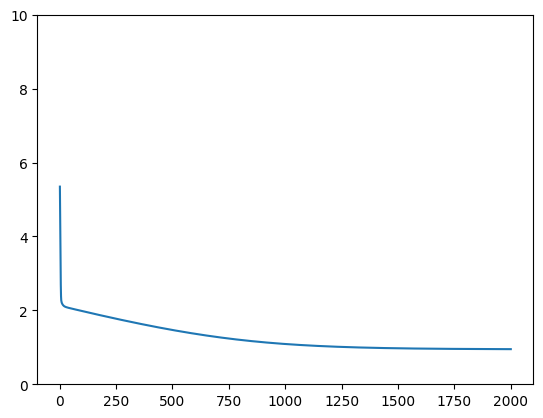

In [63]:
plt.plot(np.arange(1, epochs+1), np.log10(iter_loss))
plt.ylim((0, 10))

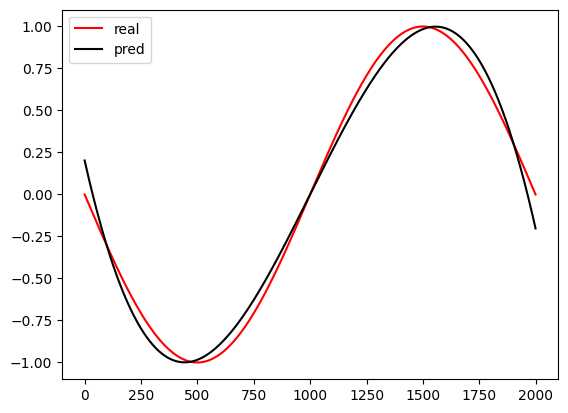

In [56]:
plt.plot(np.sin(x), color = "r", label="real")
plt.plot(y_pred, color = "k", label="pred")
plt.legend()

In [65]:
# Now use the above using torch
dtype = torch.float
device = torch.device("cpu")
device

device(type='cpu')

In [66]:
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

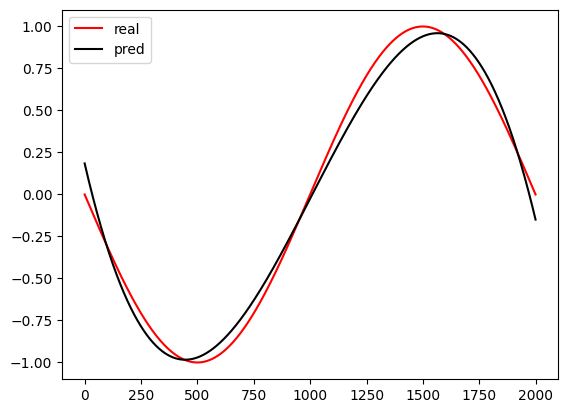

In [68]:
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)


# Training
learning_rate = 1e-6
epochs = 2000
iter_loss = torch.zeros(epochs)
for t in range(epochs):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    
    loss = (y_pred-y).pow(2).sum().item()
    iter_loss[t] = loss
    # if t % 100 == 99:
    #     print(t, loss)
        
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    
    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    
plt.plot(np.sin(x), color = "r", label="real")
plt.plot(y_pred, color = "k", label="pred")
plt.legend()

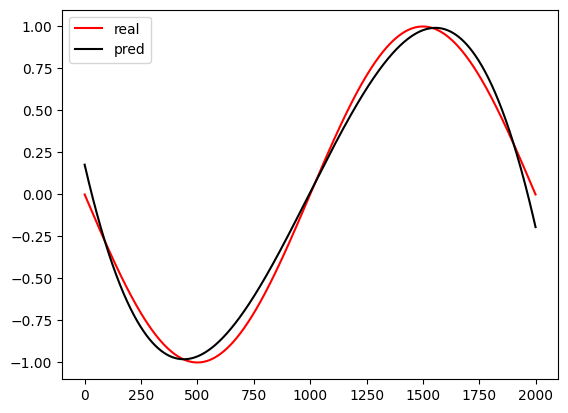

In [76]:
### We can also use the Autograd version

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)


a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)


# Training
learning_rate = 1e-6
epochs = 2000
for t in range(epochs):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    loss = (y_pred-y).pow(2).sum()
    loss.backward()
    
    with torch.no_grad():
    
        # Update weights
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
    
plt.plot(torch.sin(x), color = "r", label="real")
plt.plot(y_pred.detach().numpy(), color = "k", label="pred")
plt.legend()

In [ ]:
### we can do the above using an optimizer and a simple model

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)
